In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Section 1: Get All QB MVP Candidatates since 2004 (Last 20 Years) Clean Data so that it is Functional

#Use pd.concat to combine csv files of data. Two separate formats given for data so start by separating them into different data sets
old_format = pd.concat( 
    map(pd.read_csv, ['voting_mvp/2004.csv', 'voting_mvp/2005.csv', 'voting_mvp/2006.csv', 'voting_mvp/2007.csv'
                     ,'voting_mvp/2008.csv', 'voting_mvp/2009.csv', 'voting_mvp/2010.csv', 'voting_mvp/2011.csv',
                     'voting_mvp/2012.csv', 'voting_mvp/2013.csv', 'voting_mvp/2014.csv', 'voting_mvp/2015.csv', 'voting_mvp/2016.csv', 'voting_mvp/2017.csv', 'voting_mvp/2018.csv', 'voting_mvp/2019.csv',
                     'voting_mvp/2020.csv', 'voting_mvp/2021.csv']), ignore_index=True) 
#Includes columns like first place votes, vote points, etc. Removing extraneous columnss
modern_format = pd.concat( 
    map(pd.read_csv, ['voting_mvp/2022.csv', 'voting_mvp/2023.csv']), ignore_index=True) 


cols_modern = modern_format.iloc[0]
cols_old = old_format.iloc[0]

In [2]:
#Section 2: Cleaning. Remove columns that aren't relevant to QBs. Remove non QBs who received votes.
#Set column headers to properly represent what the columns are

old_format.columns = cols_old
modern_format.columns = cols_modern
modern_format = modern_format.drop(columns = ['1st Place', 'Vote Pts'])
old_format = old_format.drop(columns = 'Votes')

columns = ['Rk', 'Pos', 'Player', 'Tm', 'Share', 'G', 'GS', 'Cmp',
           'Att', 'Yds', 'TD', 'Int' , 'Rush_Att', 'Rush_Yds', 'Rush_TD',
           'Rec', 'Rec_Yds', 'Rec_Td', 'Solo', 'Sk', 'Int_Caught']

modern_format.columns = columns
old_format.columns = columns


#Masking to Only Get QBS
mask_modern = modern_format['Pos'] == 'QB'
mask_old = old_format['Pos'] == 'QB'
old_format = old_format[mask_old]
modern_format = modern_format[mask_modern]

In [3]:
#Section 3: Minor Adjustments. Change how Share Column works so that it is always between 0 and 1. Fix types (Floats not strings)
#Remove % Symbol at end of Vote Shares
for index, row in old_format.iterrows():
    row['Share'] = row['Share'][:-1]
for index, row in modern_format.iterrows():
    row['Share'] = row['Share'][:-1]


#Converting to floats, dividing by 100 so that they are between 0 and 1.
old_format['Share'] = old_format['Share'].astype(float)
modern_format['Share'] = modern_format['Share'].astype(float)
old_format['Share'] = old_format['Share'] / 100
modern_format['Share'] = modern_format['Share'] / 100

training_mvps = pd.concat([old_format, modern_format])


#Fixing Data Types
fix = ['Rk', 'G', 'GS', 'Cmp' , 'Att', 'Yds', 'TD', 'Int', 'Rush_Att', 'Rush_Yds', 'Rush_TD']
for f in fix:
    training_mvps[f] = training_mvps[f].astype(float)
training_mvps = training_mvps.drop(columns = ['Solo', 'Sk', 'Int_Caught', 'Rec', 'Rec_Yds', 'Rec_Td'])
print(training_mvps.dtypes)

Rk          float64
Pos          object
Player       object
Tm           object
Share       float64
G           float64
GS          float64
Cmp         float64
Att         float64
Yds         float64
TD          float64
Int         float64
Rush_Att    float64
Rush_Yds    float64
Rush_TD     float64
dtype: object


In [4]:
mask_trends = training_mvps['Rk'] == 1

trends = training_mvps[mask_trends]
trends

Rk Pos           Player                    Tm  Share     G    GS    Cmp  \
1   1.0  QB   Peyton Manning    Indianapolis Colts  0.979  16.0  16.0  336.0   
14  1.0  QB        Tom Brady  New England Patriots  0.980  16.0  16.0  398.0   
17  1.0  QB   Peyton Manning    Indianapolis Colts  0.640  16.0  16.0  371.0   
26  1.0  QB   Peyton Manning    Indianapolis Colts  0.790  16.0  16.0  393.0   
31  1.0  QB        Tom Brady  New England Patriots  1.000  16.0  16.0  324.0   
33  1.0  QB    Aaron Rodgers     Green Bay Packers  0.960  15.0  15.0  343.0   
39  1.0  QB   Peyton Manning        Denver Broncos  0.980  16.0  16.0  450.0   
42  1.0  QB    Aaron Rodgers     Green Bay Packers  0.620  16.0  16.0  341.0   
49  1.0  QB       Cam Newton     Carolina Panthers  0.960  16.0  16.0  296.0   
53  1.0  QB        Matt Ryan       Atlanta Falcons  0.500  16.0  16.0  373.0   
60  1.0  QB        Tom Brady  New England Patriots  0.800  16.0  16.0  385.0   
64  1.0  QB  Patrick Mahomes    Kansas City Chiefs  0.820  16.0  16.0  383.0   
67  1.0  QB    Lamar Jackson      Baltimore Ravens  1.000  15.0  15.0  265.0   
69  1.0  QB    Aaron Rodgers     Green Bay Packers  0.880  16.0  16.0  372.0   
73  1.0  QB    Aaron Rodgers     Green Bay Packers  0.780  16.0  16.0  366.0   
1   1.0  QB  Patrick Mahomes    Kansas City Chiefs  0.980  17.0  17.0  435.0   
17  1.0  QB    Lamar Jackson      Baltimore Ravens  0.986  16.0  16.0  307.0   

      Att     Yds    TD   Int  Rush_Att  Rush_Yds  Rush_TD  
1   497.0  4557.0  49.0  10.0      25.0      38.0      0.0  
14  578.0  4806.0  50.0   8.0      37.0      98.0      2.0  
17  555.0  4002.0  27.0  12.0      20.0      21.0      1.0  
26  571.0  4500.0  33.0  16.0      19.0     -13.0      0.0  
31  492.0  3900.0  36.0   4.0      31.0      30.0      1.0  
33  502.0  4643.0  45.0   6.0      60.0     257.0      3.0  
39  659.0  5477.0  55.0  10.0      32.0     -31.0      1.0  
42  520.0  4381.0  38.0   5.0      43.0     269.0      2.0  
49  495.0  3837.0  35.0  10.0     132.0     636.0     10.0  
53  534.0  4944.0  38.0   7.0      35.0     117.0      0.0  
60  581.0  4577.0  32.0   8.0      25.0      28.0      0.0  
64  580.0  5097.0  50.0  12.0      60.0     272.0      2.0  
67  401.0  3127.0  36.0   6.0     176.0    1206.0      7.0  
69  526.0  4299.0  48.0   5.0      38.0     149.0      3.0  
73  531.0  4115.0  37.0   4.0      33.0     101.0      3.0  
1   648.0  5250.0  41.0  12.0      61.0     358.0      4.0  
17  457.0  3678.0  24.0   7.0     148.0     821.0      5.0

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

In [6]:
# training_mvps['High_Share'] = (training_mvps['Share'] > 0.9).astype(int)

# # Select only float columns for features, excluding 'Share' and using 'High_Share' as target
# float_features = training_mvps.select_dtypes(include=[np.float64]).drop(columns=['Share'])
# X = float_features
# y = training_mvps['High_Share']

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Create and train the logistic regression model with increased max_iter
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# # # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", classification_rep)

In [7]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
# y_pred_proba = model.predict_proba(X_test)[:, 1]

# # Plot the actual Share values vs. the predicted probabilities
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test.index, y_test, color='blue', label='Actual High_Share (Binary)', alpha=0.5)
# plt.scatter(y_test.index, y_pred_proba, color='red', label='Predicted Probability (Logistic Regression)', alpha=0.5)
# plt.xlabel('Index of Test Samples')
# plt.ylabel('Probability / High_Share')
# plt.title('Logistic Regression Predicted Probability vs. Actual Binary High_Share')
# plt.legend()
# plt.show()


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.special import expit
import numpy as np

X = training_mvps.select_dtypes(include=[np.float64]).drop(columns=['Share'])
y = training_mvps['Share']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.07078726127910444
R-squared: 0.40767883897182133


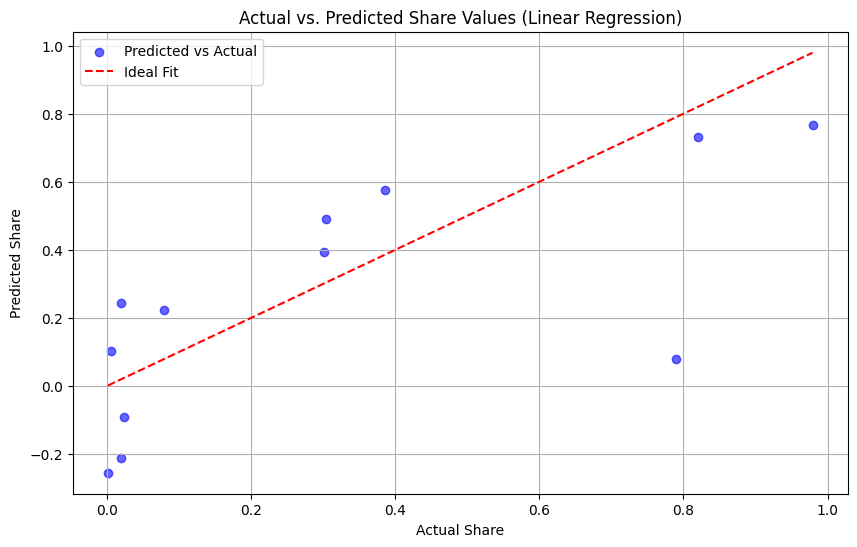

In [10]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Plot a line showing the ideal fit
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')

# Labels and title
plt.xlabel('Actual Share')
plt.ylabel('Predicted Share')
plt.title('Actual vs. Predicted Share Values (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.special import expit
import numpy as np

# Drop the first column (order number) and select the target 'Share'
X = training_mvps.select_dtypes(include=[np.float64]).drop(columns=['Share'])  # Drop the first column and 'Share' from features
y = training_mvps['Share']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the MLP regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.09911627672555168
R-squared: 0.1706322995688616


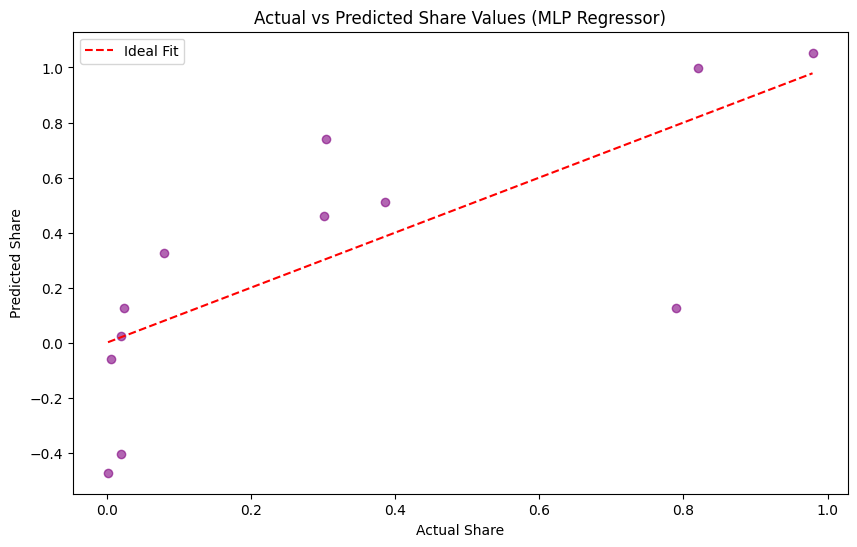

In [14]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Share')
plt.ylabel('Predicted Share')
plt.title('Actual vs Predicted Share Values (MLP Regressor)')
plt.legend()
plt.show()